In [4]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
# parameters
n_samples = 10000
k_clusters = 3
iterations = 2000

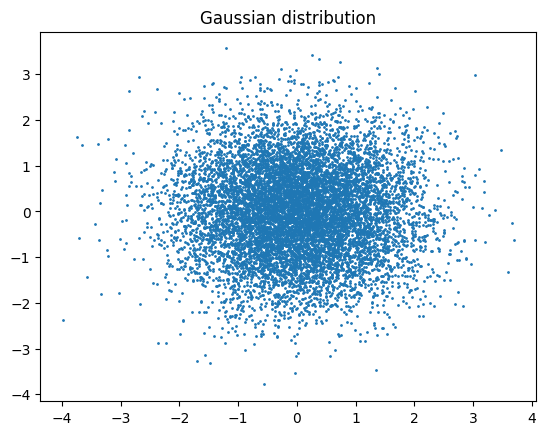

In [6]:
# standard gaussian (mean=0, std=1)
data = np.random.randn(n_samples, 2)

# plot the data
plt.figure()
plt.scatter(data[:, 0], data[:, 1], s=1)
plt.title('Gaussian distribution')
plt.show()

In [7]:
R_values = []

# kmeans clustering, get centroids, compute norms, average them
for _ in range(iterations):
    # kmeans clustering
    kmeans = KMeans(n_clusters=k_clusters, random_state=None)
    kmeans.fit(data)
    centroids = kmeans.cluster_centers_

    # calculate norms
    norms = np.linalg.norm(centroids, axis=1)
    avg_norm = np.mean(norms)

    # that is the R value
    R_values.append(avg_norm)

In [8]:
# calculate cumulative averages
cumulative_averages = np.cumsum(R_values) / np.arange(1, iterations + 1)

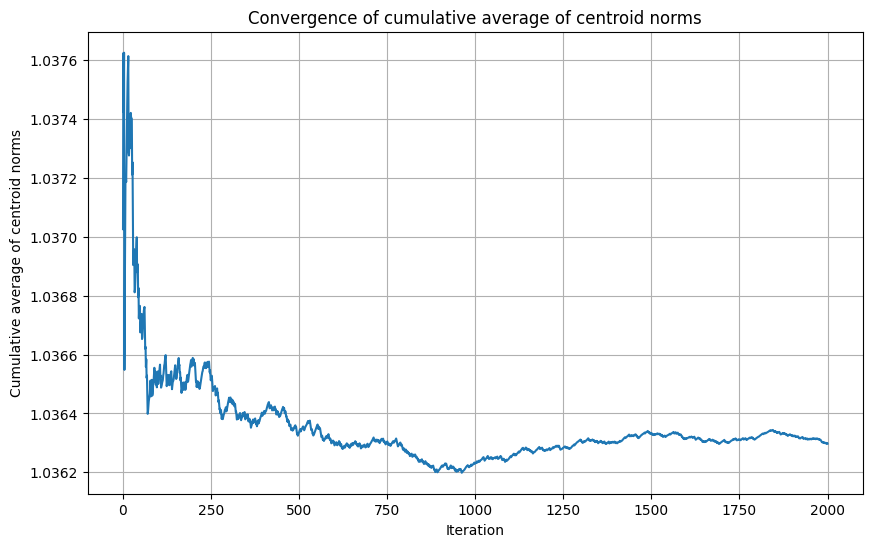

In [9]:
# plot cumulative averages
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations + 1), cumulative_averages)
plt.xlabel('Iteration')
plt.ylabel('Cumulative average of centroid norms')
plt.title('Convergence of cumulative average of centroid norms')
plt.grid(True)
plt.show()

In [10]:
tolerance = 1e-9
# target_value = 1.2533141373155002512078826424055226265034933703049691583149617881 # sqrt(pi/2)
for i in range(1, len(cumulative_averages)):
    # if abs(cumulative_averages[i] - target_value) < tolerance:
    if abs(cumulative_averages[i] - cumulative_averages[i-1]) < tolerance:
        print(f"Converged to 9-digit accuracy at iteration {i}")
        break

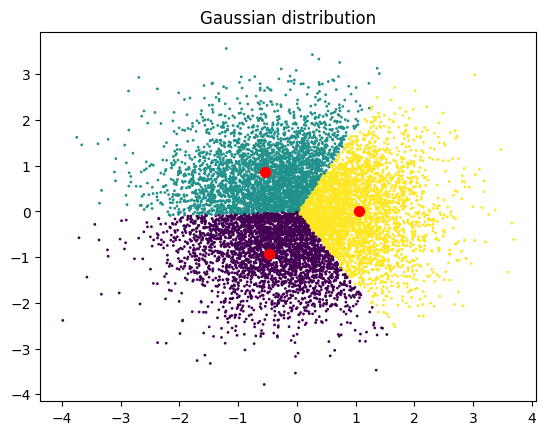

In [11]:
# plot the kmeans clustering example
kmeans = KMeans(n_clusters=3, random_state=None)
kmeans.fit(data)
centroids = kmeans.cluster_centers_
clusters = kmeans.predict(data)

plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=clusters, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title('Gaussian distribution')
plt.show()